The data used is 100 images from VOC_2012 in the 'demo_data' folder of current directory.  
100 images in train-data  
33 images in test-data  

In [1]:
from utils import *
tf.reset_default_graph()
sess = tf.InteractiveSession()
print ("Packs loaded...")

Packs loaded...


# Load Image Data

In [2]:
# Location of the files
train_image = 'demo_data/train_images/'
train_segments = 'demo_data/train_segmented/'
test_image = 'demo_data/test_images/'
test_segments = 'demo_data/test_segmented/'

trainimglist, trainannotlist = get_img_list(train_image, train_segments)
testimglist, testannotlist = get_img_list(test_image, test_segments)
trainimglist.sort()
trainannotlist.sort()
testimglist.sort()
testannotlist.sort()
trainData, trainLabel, trainLabelOneHot = data_preprocess(trainimglist, trainannotlist, sess)
testData, testLabel, testLabelOneHot = data_preprocess(testimglist, testannotlist, sess)


print ("%d train images" % (len(trainimglist)))
print ("%d train annotations" % (len(trainannotlist)))

print ("%d test images" % (len(testimglist)))
print ("%d test annotations" % (len(testannotlist)))

print ("                               N * H *  W * C")
print ("Training images:            ", trainData.shape)
print ("Training annotation images: ", trainLabel.shape)
print ("Test images:                ", testData.shape)
print ("Test annotations images:    ", testLabel.shape)

print ()
print ("Shape of 'trainLabelOneHot': %s" % (trainLabelOneHot.shape,))
print ("Shape of 'testLabelOneHot' : %s" % (testLabelOneHot.shape,))
print ("\n* * * DATA PROCESSING COMPLETED * * *")

# Memory consumption (by default np.array is FLOAT32 i.e. 32 bits)
print ("Train Image data     : %.2f" % (trainData.nbytes / (1024*1024)), " MB")
print ("Train Annotation data: %.2f" % (trainLabel.nbytes / (1024*1024)), " MB")
print ("Test Image data      : %.2f" % (testData.nbytes / (1024*1024)), " MB")
print ("Test Annotation data : %.2f" % (testLabel.nbytes / (1024*1024)), " MB")

print ("Train One-Hot Annotation data: %.2f" % (trainLabelOneHot.nbytes / (1024*1024)), " MB")
print ("Test One-Hot Annotation data : %.2f" % (testLabelOneHot.nbytes / (1024*1024)), " MB")

100 train images
100 train annotations
33 test images
33 test annotations
                               N * H *  W * C
Training images:             (100, 224, 224, 3)
Training annotation images:  (100, 224, 224, 1)
Test images:                 (33, 224, 224, 3)
Test annotations images:     (33, 224, 224, 1)

Shape of 'trainLabelOneHot': (100, 224, 224, 2)
Shape of 'testLabelOneHot' : (33, 224, 224, 2)

* * * DATA PROCESSING COMPLETED * * *
Train Image data     : 14.36  MB
Train Annotation data: 4.79  MB
Test Image data      : 4.74  MB
Test Annotation data : 1.58  MB
Train One-Hot Annotation data: 38.28  MB
Test One-Hot Annotation data : 12.63  MB


# Visualize Image Data

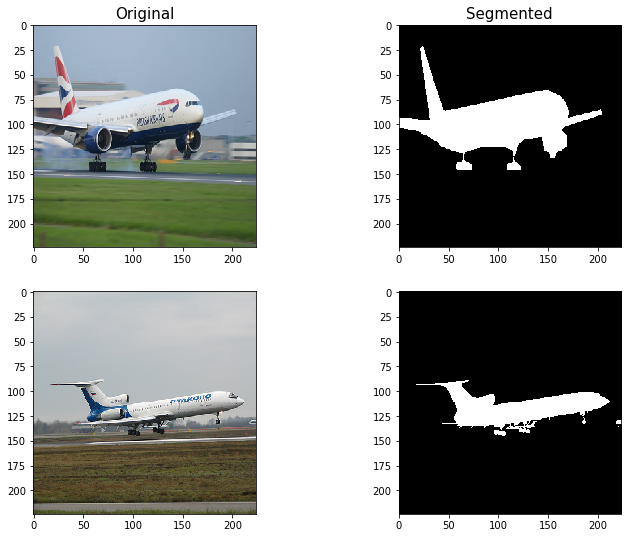

In [3]:
# Samples from data set
%matplotlib inline
fig = plt.figure(figsize=(12,9))
gs = gridspec.GridSpec(2, 2)

idx = 10
# Sample_1
ax11 = fig.add_subplot(gs[0, 0])
ax11.imshow(trainData[idx])
#ax11.axis('off')
ax11.set_title('Original', fontsize=15)

ax12 = fig.add_subplot(gs[0, 1])
ax12.imshow(trainLabel[idx,:,:,0], cmap='gray')
#ax12.axis('off')
ax12.set_title('Segmented', fontsize=15)

# Sample_2
ax21 = fig.add_subplot(gs[1, 0])
ax21.imshow(testData[idx])
#ax21.axis('off')

ax22 = fig.add_subplot(gs[1, 1])
ax22.imshow(testLabel[idx,:,:,0], cmap='gray')
#ax22.axis('off')


# Initialize Weights 

In [4]:
height = 224
width = 224
nrclass = 2
# Define placeholders
x = tf.placeholder(tf.float32, [None, height, width, 3], name="X_image")
tf.summary.image("image", x, 3)
y = tf.placeholder(tf.float32, [None, height, width, nrclass], name="y_ground_truth")
keepprob = tf.placeholder(tf.float32)
#keepprob yet to be added to the DeconvNet-------------------------------------



weights = {
    "wc1" : weight_variable([3, 3, 3, 64], "Weight_conv_1"),
    "wc2" : weight_variable([3, 3, 64, 64], "Weight_conv_2"),
    "wc3" : weight_variable([3, 3, 64, 128], "Weight_conv_3"),
    "wc4" : weight_variable([3, 3, 128, 128], "Weight_conv_4"),
    "wc5" : weight_variable([3, 3, 128, 256], "Weight_conv_5"),
    "wc6" : weight_variable([3, 3, 256, 256], "Weight_conv_6"),
    "wc7" : weight_variable([3, 3, 256, 256], "Weight_conv_7"),
    "wc8" : weight_variable([3, 3, 256, 512], "Weight_conv_8"),
    "wc9" : weight_variable([3, 3, 512, 512], "Weight_conv_9"),
    "wc10" : weight_variable([3, 3, 512, 512], "Weight_conv_10"),
    "wc11" : weight_variable([3, 3, 512, 512], "Weight_conv_11"),
    "wc12" : weight_variable([3, 3, 512, 512], "Weight_conv_12"),
    "wc13" : weight_variable([3, 3, 512, 512], "Weight_conv_13"),
    "wc14" : weight_variable([7, 7, 512, 2048], "Weight_conv_14"),
    "wc15" : weight_variable([1, 1, 2048, 2048], "Weight_conv_15"),
    "wc16" : weight_variable([7, 7, 512, 2048], "Weight_conv_16"),
    "wc17" : weight_variable([3, 3, 512, 512], "Weight_conv_17"),
    "wc18" : weight_variable([3, 3, 512, 512], "Weight_conv_18"),
    "wc19" : weight_variable([3, 3, 512, 512], "Weight_conv_19"),
    "wc20" : weight_variable([3, 3, 512, 512], "Weight_conv_20"),
    "wc21" : weight_variable([3, 3, 512, 512], "Weight_conv_21"),
    "wc22" : weight_variable([3, 3, 256, 512], "Weight_conv_22"),
    "wc23" : weight_variable([3, 3, 256, 256], "Weight_conv_23"),
    "wc24" : weight_variable([3, 3, 256, 256], "Weight_conv_24"),
    "wc25" : weight_variable([3, 3, 128, 256], "Weight_conv_25"),
    "wc26" : weight_variable([3, 3, 128, 128], "Weight_conv_26"),
    "wc27" : weight_variable([3, 3, 64, 128], "Weight_conv_27"),
    "wc28" : weight_variable([3, 3, 64, 64], "Weight_conv_28"),
    "wc29" : weight_variable([3, 3, 64, 64], "Weight_conv_29"),
    "wc30" : weight_variable([1, 1, 2, 64], "Weight_conv_30")
    }

biases = {
    "bc1" : bias_variable([64], "Bias_conv_1"),
    "bc2" : bias_variable([64], "Bias_conv_2"),
    "bc3" : bias_variable([128], "Bias_conv_3"),
    "bc4" : bias_variable([128], "Bias_conv_4"),
    "bc5" : bias_variable([256], "Bias_conv_5"),
    "bc6" : bias_variable([256], "Bias_conv_6"),
    "bc7" : bias_variable([256], "Bias_conv_7"),
    "bc8" : bias_variable([512], "Bias_conv_8"),
    "bc9" : bias_variable([512], "Bias_conv_9"),
    "bc10" : bias_variable([512], "Bias_conv_10"),
    "bc11" : bias_variable([512], "Bias_conv_11"),
    "bc12" : bias_variable([512], "Bias_conv_12"),
    "bc13" : bias_variable([512], "Bias_conv_13"),
    "bc14" : bias_variable([2048], "Bias_conv_2"),
    "bc15" : bias_variable([2048], "Bias_conv_3"),
    "bc16" : bias_variable([512], "Bias_conv_16"),
    "bc17" : bias_variable([512], "Bias_conv_17"),
    "bc18" : bias_variable([512], "Bias_conv_18"),
    "bc19" : bias_variable([512], "Bias_conv_19"),
    "bc20" : bias_variable([512], "Bias_conv_20"),
    "bc21" : bias_variable([512], "Bias_conv_21"),
    "bc22" : bias_variable([256], "Bias_conv_22"),
    "bc23" : bias_variable([256], "Bias_conv_23"),
    "bc24" : bias_variable([256], "Bias_conv_24"),
    "bc25" : bias_variable([128], "Bias_conv_25"),
    "bc26" : bias_variable([128], "Bias_conv_26"),
    "bc27" : bias_variable([64], "Bias_conv_27"),
    "bc28" : bias_variable([64], "Bias_conv_28"),
    "bc29" : bias_variable([64], "Bias_conv_29"),
    "bc30" : bias_variable([2], "Bias_conv_30")
    }

# Model Architecture

In [5]:
#------------Architecture---------------------------------------------------------------------------------------------------
def decon_net(x, weights, biases):
    # dropout layers need to be added------------------------------------------
    conv_1_1 = conv_layer(x, weights['wc1'], biases['bc1'])                      
    conv_1_2 = conv_layer(conv_1_1, weights['wc2'], biases['bc2'])
    
    pool_1, pool_1_argmax = pool_layer(conv_1_2)
    
    conv_2_1 = conv_layer(pool_1, weights['wc3'], biases['bc3'])
    conv_2_2 = conv_layer(conv_2_1, weights['wc4'], biases['bc4'])
    
    pool_2, pool_2_argmax = pool_layer(conv_2_2)
    
    conv_3_1 = conv_layer(pool_2, weights['wc5'], biases['bc5'])
    conv_3_2 = conv_layer(conv_3_1, weights['wc6'], biases['bc6'])
    conv_3_3 = conv_layer(conv_3_2, weights['wc7'], biases['bc7'])
    
    pool_3, pool_3_argmax = pool_layer(conv_3_3)
    
    conv_4_1 = conv_layer(pool_3, weights['wc8'], biases['bc8'])
    conv_4_2 = conv_layer(conv_4_1, weights['wc9'], biases['bc9'])
    conv_4_3 = conv_layer(conv_4_2, weights['wc10'], biases['bc10'])
    
    pool_4, pool_4_argmax = pool_layer(conv_4_3)
    
    conv_5_1 = conv_layer(pool_4, weights['wc11'], biases['bc11'])
    conv_5_2 = conv_layer(conv_5_1, weights['wc12'], biases['bc12'])
    conv_5_3 = conv_layer(conv_5_2, weights['wc13'], biases['bc13'])
    
    pool_5, pool_5_argmax = pool_layer(conv_5_3)
    
    fc_6 = conv_layer(pool_5, weights['wc14'], biases['bc14'])
    fc_7 = conv_layer(fc_6, weights['wc15'], biases['bc15'])
    
    deconv_fc_6 = deconv_layer(fc_7, weights['wc16'], biases['bc16'])
    
    unpool_5 = unpool_layer2x2_batch(deconv_fc_6, pool_5_argmax)
    
    deconv_5_3 = deconv_layer(unpool_5, weights['wc17'], biases['bc17'])
    deconv_5_2 = deconv_layer(deconv_5_3, weights['wc18'], biases['bc18'])
    deconv_5_1 = deconv_layer(deconv_5_2, weights['wc19'], biases['bc19'])
    
    unpool_4 = unpool_layer2x2_batch(deconv_5_1, pool_4_argmax)
    
    deconv_4_3 = deconv_layer(unpool_4, weights['wc20'], biases['bc20'])
    deconv_4_2 = deconv_layer(deconv_4_3, weights['wc21'], biases['bc21'])
    deconv_4_1 = deconv_layer(deconv_4_2, weights['wc22'], biases['bc22'])
    
    unpool_3 = unpool_layer2x2_batch(deconv_4_1, pool_3_argmax)
    
    deconv_3_3 = deconv_layer(unpool_3, weights['wc23'], biases['bc23'])
    deconv_3_2 = deconv_layer(deconv_3_3, weights['wc24'], biases['bc24'])
    deconv_3_1 = deconv_layer(deconv_3_2, weights['wc25'], biases['bc25'])
    
    unpool_2 = unpool_layer2x2_batch(deconv_3_1, pool_2_argmax)
    
    deconv_2_2 = deconv_layer(unpool_2, weights['wc26'], biases['bc26'])
    deconv_2_1 = deconv_layer(deconv_2_2, weights['wc27'], biases['bc27'])
    
    unpool_1 = unpool_layer2x2_batch(deconv_2_1, pool_1_argmax)
    
    deconv_1_2 = deconv_layer(unpool_1, weights['wc28'], biases['bc28'])
    deconv_1_1 = deconv_layer(deconv_1_2, weights['wc29'], biases['bc29'])
    
    pred = deconv_layer(deconv_1_1, weights['wc30'], biases['bc30'])
    return pred


pred = decon_net(x, weights, biases)

# 'predmax' is the predicted-segmentation of input image (Grayscale)
# it is tensor of type [N x H x W x 1]
predmax = tf.argmax(pred, 3) 

# 'ymax' is the ground-truth-segmentation of input image (Grayscale)
# (equal to original annotations)
# it is tensor of type [N x H x W x 1]
ymax = tf.argmax(y, 3)

lin_pred = tf.reshape(pred, shape=[-1, nrclass])
lin_y = tf.reshape(y, shape=[-1, nrclass])

with tf.name_scope("Cross_entropy"):
    # Set it to false if you want to use customized method for cross_entropy
    if False:
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=lin_pred, labels=lin_y))
    else:
        n = 0.7
        pred = tf.nn.softmax(pred)
        cross_entropy = - n * (tf.reduce_sum(lin_y * tf.log(lin_pred))) - (1-n) * (tf.reduce_sum((1-lin_y) * tf.log(1-lin_pred)))
    tf.summary.scalar("cross_entropy", cross_entropy)
    
with tf.name_scope("Train_step"):
    optm = tf.train.AdamOptimizer(0.000001).minimize(cross_entropy)
    
with tf.name_scope("Accuracy"):
    correct = tf.equal(ymax, predmax) 
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    tf.summary.scalar("accuracy", accuracy)

print('Network ready')

Network ready


# Training

In [6]:
LOGDIR = "tmp/deconv_net/"
PLOT_DIR = "plots"
batch_size = 10
n_epochs = 100
ntrain = trainData.shape[0]
num_batch = 3#int(ntrain/batch_size)+1
resumeTraining = True

# it is interactive session
# you need to initialize all variables
init = tf.global_variables_initializer()
sess.run(init)

saver = tf.train.Saver()
checkpoint = tf.train.latest_checkpoint("saved_ckpt/")
print ("checkpoint: %s" % (checkpoint))
if  checkpoint:
    print ("Restoring from checkpoint", checkpoint)
    saver.restore(sess, checkpoint)
else:
    print ("Couldn't find checkpoint to restore from. Starting over.")

merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter(LOGDIR, graph=tf.get_default_graph())


for epoch_i in range(n_epochs):
    print ("**** Iteration: ", epoch_i)

    for mini_epoch_i in range(num_batch):
        # creating a 'mini-batch'
        randidx = np.random.randint(ntrain, size=batch_size)
        batchData = trainData[randidx]
        batchLabel = trainLabelOneHot[randidx]
        
        s, cross_entropy_i, accuracy_i = sess.run([merged_summary, cross_entropy, accuracy], 
                                                  feed_dict={x: batchData, y: batchLabel})
        writer.add_summary(s, mini_epoch_i + num_batch*epoch_i)
        
        if mini_epoch_i % 1 == 0:
            print ("\tMini-Batch: ", mini_epoch_i, 
                   "\tTrain Cross-Entropy: ", cross_entropy_i, 
                   "\tTrain Accuracy: ", accuracy_i)
                                      
    # Sample results
    img = generate_samples(epoch_i, trainData, trainLabelOneHot, sess, height, width)
    save_figure(PLOT_DIR, epoch_i, "train-", img[0], img[1], img[2], img[3])

    img = generate_samples(epoch_i, testData, testLabelOneHot, sess, height, width)
    save_figure(PLOT_DIR, epoch_i, "test-", img[0], img[1], img[2], img[3])


    # Evaluate TEST-DATA after every 5 iterations
    # (only first 10 images of test set are taken)
    if epoch_i % 5 == 0:
        test_cross_entropy, test_accuracy = sess.run([cross_entropy, accuracy], 
                                                     feed_dict={x: testData[0:10], 
                                                                y: testLabelOneHot[0:10]})
        print ("Test Cross-Entropy: ", test_cross_entropy, 
               "Test Accuracy: ", test_accuracy)

    # tf.Save
    saver.save(sess, 'saved_ckpt/', global_step = epoch_i)
print ("Done")

checkpoint: None
Couldn't find checkpoint to restore from. Starting over.
**** Iteration:  0


InvalidArgumentError: No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: MaxPoolWithArgmax = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](conv__1/Sigmoid)]]

Caused by op 'MaxPoolWithArgmax', defined at:
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-b42a53e7fbca>", line 69, in <module>
    pred = decon_net(x, weights, biases)
  File "<ipython-input-5-b42a53e7fbca>", line 7, in decon_net
    pool_1, pool_1_argmax = pool_layer(conv_1_2)
  File "/home/itachi/Approaches-for-DeconvNet/utils.py", line 100, in pool_layer
    pool_maps, pool_argmax = tf.nn.max_pool_with_argmax(x_input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1893, in max_pool_with_argmax
    Targmax=Targmax, name=name)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/itachi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: MaxPoolWithArgmax = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](conv__1/Sigmoid)]]
